# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [26]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from time import time
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

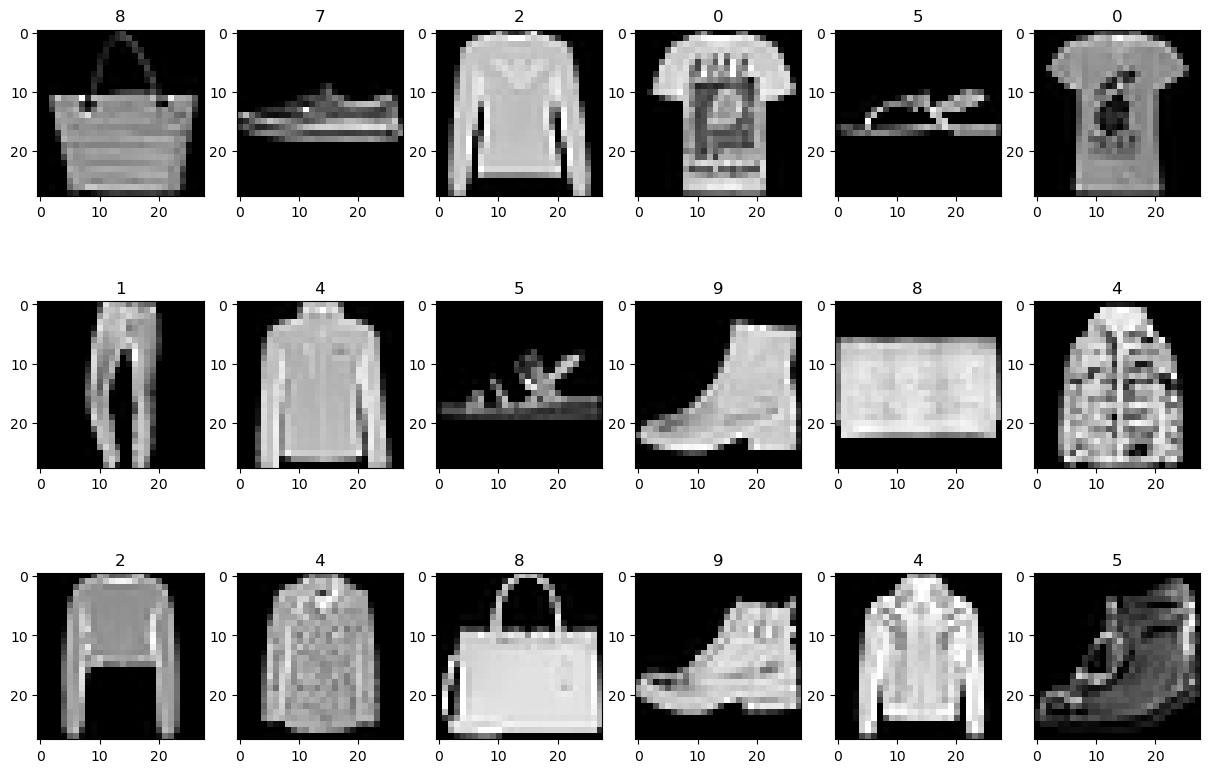

In [10]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [13]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [15]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8200 - loss: 0.5167 - val_accuracy: 0.8826 - val_loss: 0.3314
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9022 - loss: 0.2743 - val_accuracy: 0.8907 - val_loss: 0.3055
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9175 - loss: 0.2279 - val_accuracy: 0.8937 - val_loss: 0.3037
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9304 - loss: 0.1948 - val_accuracy: 0.8961 - val_loss: 0.3110
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9420 - loss: 0.1662 - val_accuracy: 0.8966 - val_loss: 0.3272
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9509 - loss: 0.1420 - val_accuracy: 0.8908 - val_loss: 0.3714
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9567 - loss: 0.1258 - val_accuracy: 0.8911 - val_loss: 0.4093
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9603 - loss: 0.1133 - 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9891 - loss: 0.0311 - val_accuracy: 0.8822 - val_loss: 1.0309
Epoch 31/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9892 - loss: 0.0303 - val_accuracy: 0.8799 - val_loss: 1.0087
Epoch 32/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9876 - loss: 0.0319 - val_accuracy: 0.8793 - val_loss: 1.0567
Epoch 33/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9893 - loss: 0.0310 - val_accuracy: 0.8798 - val_loss: 1.1201
Epoch 36/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9906 - loss: 0.0267 - val_accuracy: 0.8742 - val_loss: 1.1762
Epoch 37/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9902 - loss: 0.0287 - val_accuracy: 0.8796 - val_loss: 1.1812
Epoch 38/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9919 - loss: 0.0227 - val_accuracy: 0.8847 - val_loss: 1.1445
Epoch 39/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9920 - loss: 0.0229 - val_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9924 - loss: 0.0203 - val_accuracy: 0.8771 - val_loss: 1.4214
Epoch 50/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9940 - loss: 0.0160 - val_accuracy: 0.8767 - val_loss: 1.4464


Train Acc      0.9938666820526123
Validation Acc 0.8766999840736389


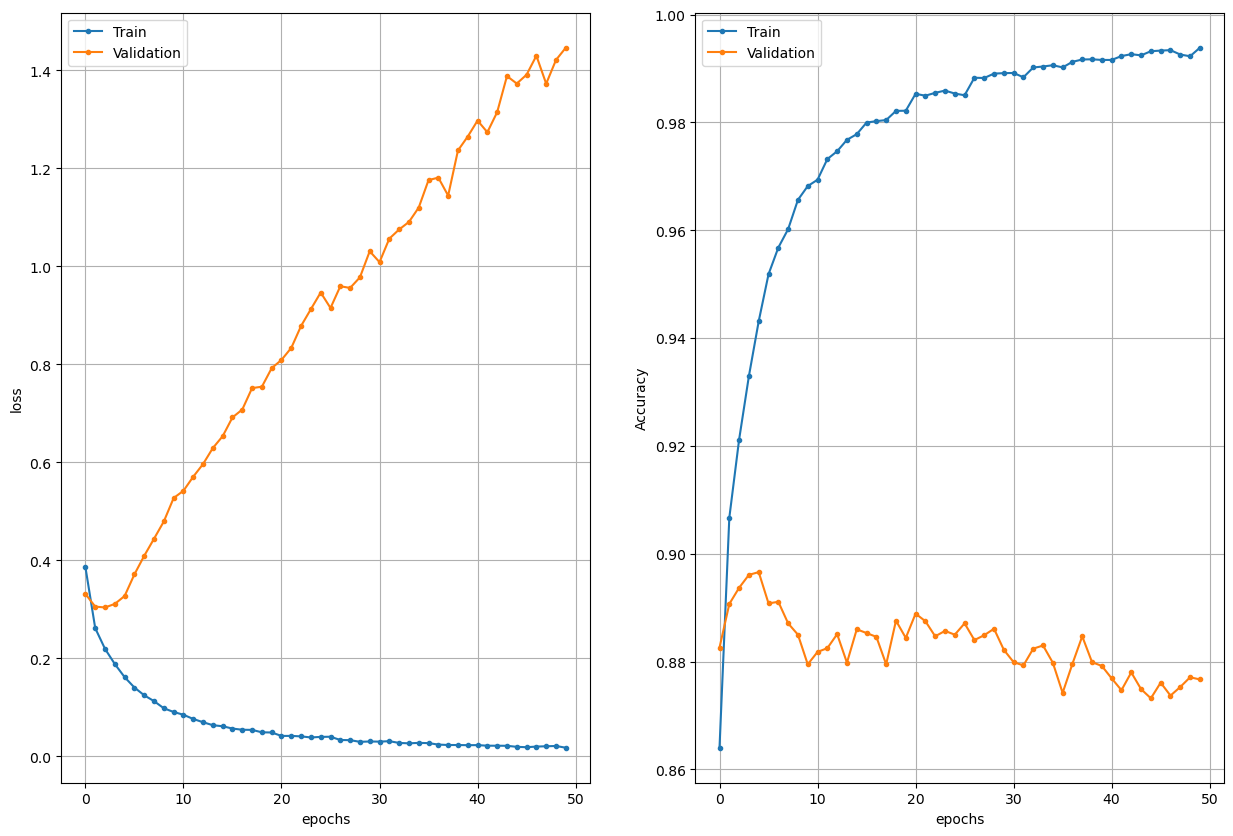

In [18]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

num_classes = 10
epochs = 50
batch_size = 64

datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.05,
    zoom_range=0.05
)
datagen.fit(x_train)

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(net)
net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Flatten()(net)
net = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(net)
net = Dropout(0.3)(net)
outputs = Dense(num_classes, activation='softmax')(net)

model = Model(inputs, outputs)
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7387 - loss: 0.7838
Epoch 1: val_accuracy improved from -inf to 0.85770, saving model to best_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.7388 - loss: 0.7836 - val_accuracy: 0.8577 - val_loss: 0.4236 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8415 - loss: 0.4668
Epoch 2: val_accuracy did not improve from 0.85770
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.8415 - loss: 0.4668 - val_accuracy: 0.8492 - val_loss: 0.4392 - learning_rate: 0.0010
Epoch 3/50
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8591 - loss: 0.4252
Epoch 3: val_accuracy did not improve from 0.85770
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8591 - loss: 0.4252 - val_accuracy: 0.8484 - val_loss: 0.4408 - learning_rate: 0.0010
Epoch 4/50
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8695 - loss: 0.4050
Epoch 4: val_accuracy improved from 0.85770 to

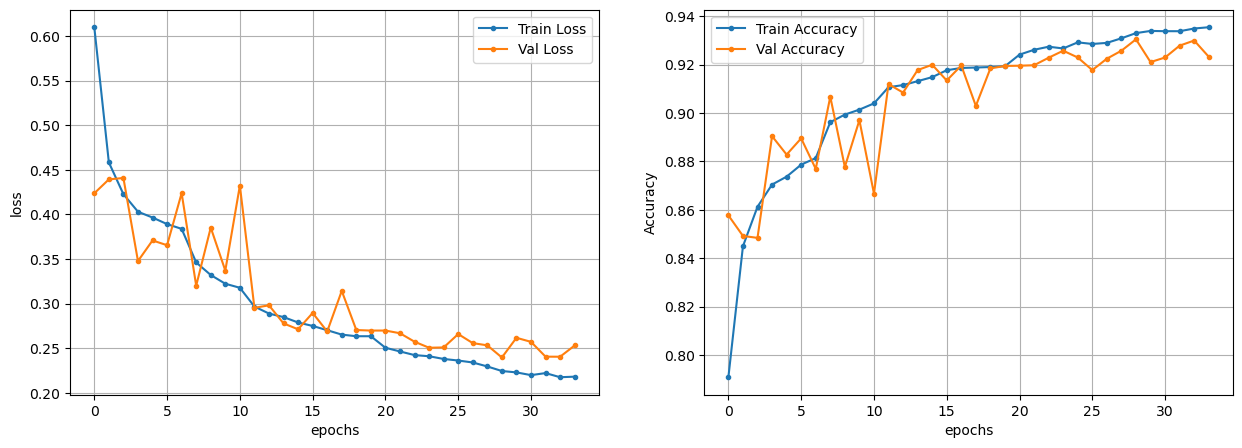

Final Train Accuracy:      0.9354000091552734
Final Validation Accuracy: 0.9232000112533569


In [44]:
model.load_weights('best_model.keras')

def plot_history(history):
    h = history.history
    epochs_range = range(len(h['loss']))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, h['loss'], '.-', label='Train Loss')
    plt.plot(epochs_range, h['val_loss'], '.-', label='Val Loss')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, h['accuracy'], '.-', label='Train Accuracy')
    plt.plot(epochs_range, h['val_accuracy'], '.-', label='Val Accuracy')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print('Final Train Accuracy:     ', h['accuracy'][-1])
    print('Final Validation Accuracy:', h['val_accuracy'][-1])

plot_history(history)

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Best Model Test Accuracy:", test_acc)

Best Model Test Accuracy: 0.930400013923645


### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

Two convolutional layers followed by max pooling layer. L2 regulatization, dropout, batch normalization, data augmentation. Used ReduceLROnPlateau to automatically decrease the learning rate when the validation loss plateaued. Employed early stopping to halt training when the validation loss stopped improving, preventing the model from overfitting by training for too many epochs. Used a model checkpoint callback to save the best performing model weights, ensuring that the final deployed model is the best encountered during training.

From my mistakes that I made I can name the following: too strong L2 regularization, too much dropout, no pooling layers, too aggresive data augmentation, and I had no learning rate adjustment.